In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/Harsha/OneDrive/Desktop/stata\El/College_data.csv")


In [2]:
data.shape

(6788, 12)

C:\Users\Harsha\AppData\Local\Temp\ipykernel_11012\3695550106.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Blues', 10)


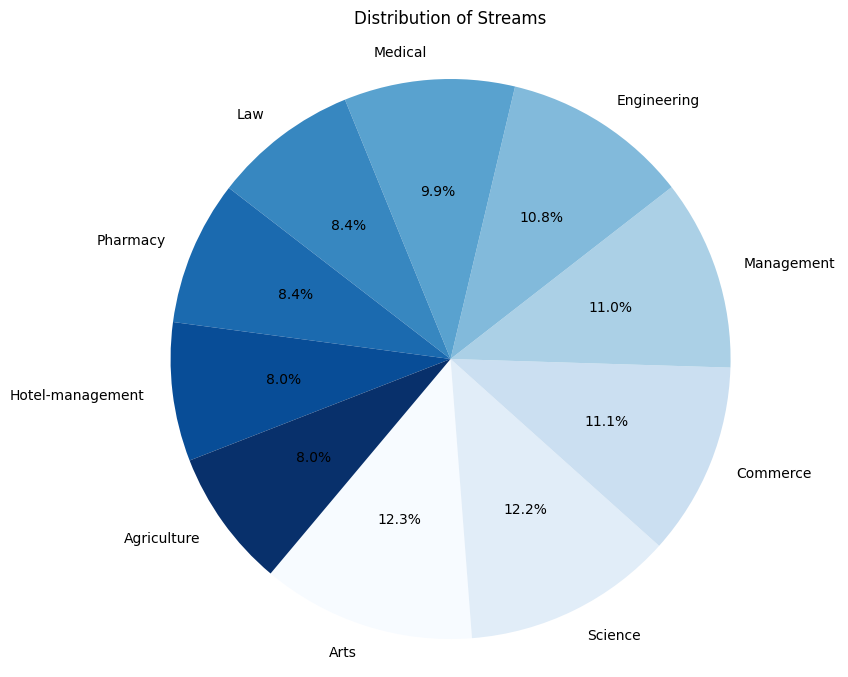

In [3]:

stream_counts = data['Stream'].value_counts(normalize=True)
labels = stream_counts.index
sizes = stream_counts.values

colors = plt.cm.get_cmap('Blues', 10)
colors = colors(np.linspace(0, 1, len(labels)))

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=230, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Streams', pad=20)
plt.show()


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   College_Name    6788 non-null   object
 1   State           6788 non-null   object
 2   Stream          6788 non-null   object
 3   UG_fee          6788 non-null   object
 4   PG_fee          6788 non-null   object
 5   Rating          6788 non-null   object
 6   Academic        6788 non-null   object
 7   Accommodation   6788 non-null   object
 8   Faculty         6788 non-null   object
 9   Infrastructure  6788 non-null   object
 10  Placement       6788 non-null   object
 11  Social_Life     6788 non-null   object
dtypes: object(12)
memory usage: 636.5+ KB


In [5]:
data.nunique()

College_Name      3120
State               35
Stream              10
UG_fee            2367
PG_fee            1572
Rating              66
Academic            54
Accommodation       72
Faculty             54
Infrastructure      64
Placement           74
Social_Life         65
dtype: int64

In [6]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Academic'] = pd.to_numeric(data['Academic'], errors='coerce')
data['Accommodation'] = pd.to_numeric(data['Accommodation'], errors='coerce')
data['Faculty'] = pd.to_numeric(data['Faculty'], errors='coerce')
data['Infrastructure'] = pd.to_numeric(data['Infrastructure'], errors='coerce')
data['Placement'] = pd.to_numeric(data['Placement'], errors='coerce')
data['Social_Life'] = pd.to_numeric(data['Social_Life'], errors='coerce')
summary_statistics = data.describe()
print(summary_statistics)

            Rating     Academic  Accommodation      Faculty  Infrastructure   
count  6056.000000  5942.000000    5899.000000  5881.000000     5872.000000  \
mean      7.809891     8.142427       7.274402     8.123380        7.962108   
std       0.792891     0.733438       1.056254     0.730026        0.890078   
min       2.000000     2.000000       1.000000     1.000000        1.000000   
25%       7.400000     7.800000       6.800000     7.800000        7.500000   
50%       7.900000     8.200000       7.400000     8.200000        8.000000   
75%       8.300000     8.600000       8.000000     8.600000        8.600000   
max      10.000000     9.800000       9.800000     9.900000        9.900000   

         Placement  Social_Life  
count  5898.000000  5834.000000  
mean      7.234791     7.938207  
std       1.261875     0.889789  
min       1.000000     1.000000  
25%       6.600000     7.500000  
50%       7.500000     8.100000  
75%       8.100000     8.500000  
max       9.9000

In [7]:
count_universities = data.groupby('State')['College_Name'].nunique()
print(count_universities)

State
Andaman                5
Andhra pradesh       183
Arunachal pradesh     30
Assam                112
Bihar                126
Chandigarh            70
Chhattisgarh         100
Dadra                  3
Daman                  1
Delhi ncr            166
Goa                   47
Gujarat              144
Haryana              113
Himachal pradesh      88
Jammu                 80
Jharkhand             86
Karnataka            187
Kerala               204
Madhya pradesh       112
Maharashtra          196
Manipur               24
Meghalaya             31
Mizoram               18
Nagaland              36
Orissa               149
Puducherry            54
Punjab               122
Rajasthan             84
Sikkim                18
Tamil nadu           172
Telangana            182
Tripura               24
Uttar pradesh        159
Uttarakhand          116
West bengal          169
Name: College_Name, dtype: int64


In [8]:
#removing duplicate data with same state,college name,stream
import pandas as pd
df = data
df_without_duplicates = df.drop_duplicates(subset=['College_Name', 'State', 'Stream'])
df_without_duplicates.shape

(6765, 12)